In [2]:
import matplotlib.pyplot as plt 
import pandas as pd

In [10]:
oil_df = pd.read_csv('oil.csv')
print(type(oil_df))
print(oil_df)

<class 'pandas.core.frame.DataFrame'>
            date  dcoilwtico
0     2013-01-01         NaN
1     2013-01-02       93.14
2     2013-01-03       92.97
3     2013-01-04       93.12
4     2013-01-07       93.20
...          ...         ...
1213  2017-08-25       47.65
1214  2017-08-28       46.40
1215  2017-08-29       46.46
1216  2017-08-30       45.96
1217  2017-08-31       47.26

[1218 rows x 2 columns]


In [12]:
x=oil_df['date']
y=oil_df['dcoilwtico']

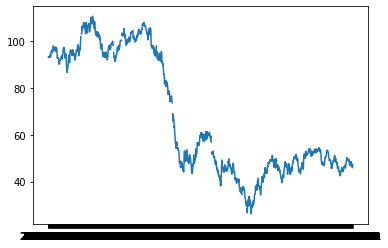

In [13]:
plt.plot(x,y)